In [1]:
import torch, h5py
from qml_ssl.data import create_data_loader, load_qg_img
from qml_ssl.models.img_classical import Conv_Classifier, Conv_SupContrastive,  LinearProbe
from qml_ssl.utils.plotting import generate_embeddings, vmf_kde_on_circle, pca_proj, tsne_proj, plot_training
from qml_ssl.utils.training import get_trainer

import warnings
# Ignore all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

torch.set_float32_matmul_precision('medium')

## Quark-Gluon Image Dataset

In [2]:
classes = (0, 1)
reduce_dim = 16

# f_n794k = h5py.File("../../data/QG_Images/quark-gluon_train-set_n793900.hdf5","r")
f_n140k = h5py.File("../../data/QG_Images/quark-gluon_test-set_n139306.hdf5","r")
# f_n10k = h5py.File("../../data/QG_Images/quark-gluon_test-set_n10000.hdf5","r")

x = f_n140k.get("X_jets") # f_n10k.get("X")
y = f_n140k.get("y")

qg_data = load_qg_img(x, y, dataset_size=20000, reduced_dim=reduce_dim)

train_loader = create_data_loader(qg_data["train_data"], qg_data["train_labels"])
val_loader = create_data_loader(qg_data["val_data"], qg_data["val_labels"], shuffle=False)
test_loader = create_data_loader(qg_data["test_data"], qg_data["test_labels"], shuffle=False)

In [3]:
batch = next(iter(train_loader))

inputs, labels = batch
print(f"Input shape: {inputs.shape}")
print(f"Label shape: {labels.shape}")


Input shape: torch.Size([64, 3, 16, 16])
Label shape: torch.Size([64])


CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_classifier_qg_image/version_16


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/414bc9cd15cc49b0990cfcc3f37387d6

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                   | Type               | Params | Mode 
-----------------------------------------------------------------------
0  | encoder                | ConvEncoder        | 840    | train
1  | encoder.layers         | ModuleList         | 840    | train
2  | encoder.layers.0       | ConvUnit           | 240    | train
3  | encoder.layers.0.conv  | Conv2d             | 224    | train
4  | encoder.layers.0.bn    | BatchNorm2d        | 16     | train
5  | encoder.layers.0.activ | ReLU               | 0      | train
6  | encoder.layers.0.pool  | MaxPool2d          | 0      | train
7  | encoder.layers.1       | ConvUnit           | 600    | train
8  | encoder.layers.1.conv  | Conv2d             | 584    | train
9  | encoder.layers.1.bn    | BatchNorm2d        | 16     | train
10 | enco

Epoch 19: 100%|██████████| 250/250 [00:04<00:00, 52.38it/s, v_num=87d6, valid_loss=0.628, valid_acc=0.674, lr=1e-5, train_loss=0.621, train_acc=0.669]  

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 250/250 [00:04<00:00, 52.16it/s, v_num=87d6, valid_loss=0.628, valid_acc=0.674, lr=1e-5, train_loss=0.621, train_acc=0.669]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_classifier_qg_image
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/414bc9cd15cc49b0990cfcc3f37387d6
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr [20]         : (9.99999883788405e-06, 0.00010000000474974513)
COMET INFO:     train_acc [20]  : (0.4971874952316284, 0.6689375042915344)
COMET INFO:     train_loss [20] : (0.6213305592536926, 0.6962231397628784)
COMET INFO:     valid_acc [20]  : (0.49050000309944153, 0.6769999861717224)
COMET INFO:     valid_loss [20] : (0.6276859045028687, 1.1928966045379639)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lig

Embeddings after Training


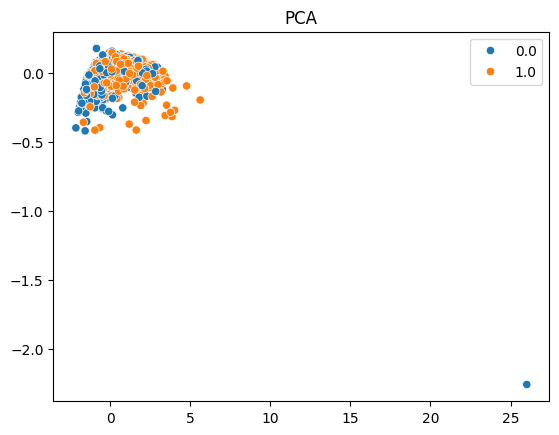

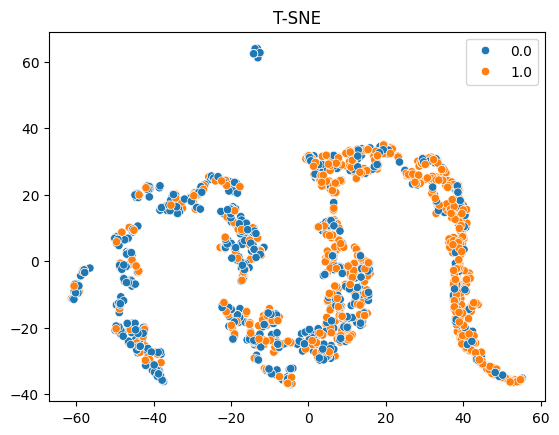

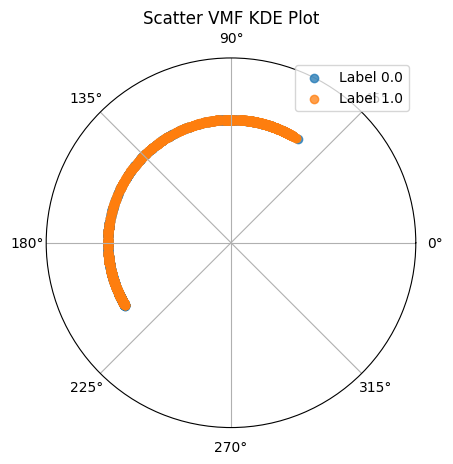

In [4]:
model = Conv_Classifier(input_channel_num=3, proj_dim=2, classes=classes, lr=1e-4, lr_scheduler_metric="valid_loss")

# Training the model
trainer, log_dir = get_trainer("conv_classifier_qg_image", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# plot_training(log_dir)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/conv_supcontrast_qg_image/version_7


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/57a6dd4a4c854ecba32e775b08038159

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                           | Type              | Params | Mode 
------------------------------------------------------------------------------
0  | encoder                        | ConvEncoder       | 840    | train
1  | encoder.layers                 | ModuleList        | 840    | train
2  | encoder.layers.0               | ConvUnit          | 240    | train
3  | encoder.layers.0.conv          | Conv2d            | 224    | train
4  | encoder.layers.0.bn            | BatchNorm2d       | 16     | train
5  | encoder.layers.0.activ         | ReLU              | 0      | train
6  | encoder.layers.0.pool          | MaxPool2d         | 0      | train
7  | encoder.layers.1               | ConvUnit          | 600    | train
8  | encoder.layers.1.conv          | Conv2d            | 584    | trai

Epoch 19: 100%|██████████| 250/250 [00:06<00:00, 39.73it/s, v_num=8159, valid_loss=1.000, train_loss=1.010]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 250/250 [00:06<00:00, 39.66it/s, v_num=8159, valid_loss=1.000, train_loss=1.010]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : conv_supcontrast_qg_image
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/57a6dd4a4c854ecba32e775b08038159
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_loss [20] : (1.0060954093933105, 1.044408917427063)
COMET INFO:     valid_loss [20] : (0.9807084798812866, 0.9998833537101746)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : conv_supcontrast_qg_image
COMET INFO:   Parameters:
COMET INFO:     activ_type         : relu
COMET INFO:     hidden_channel_num : 8
COMET INFO:     input_channel_num  : 3
COMET INFO:     layer_

Embeddings after Training


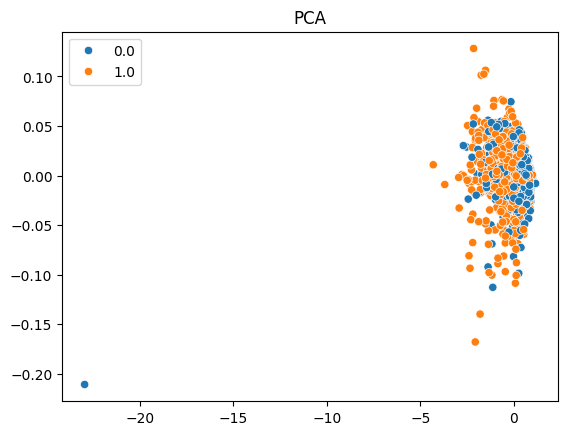

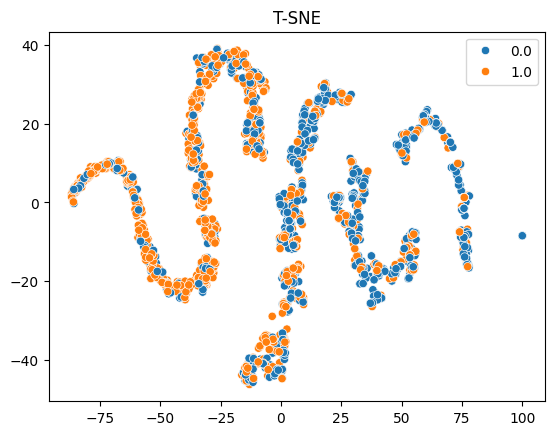

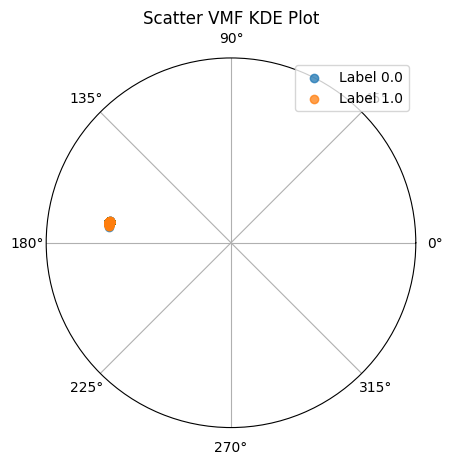

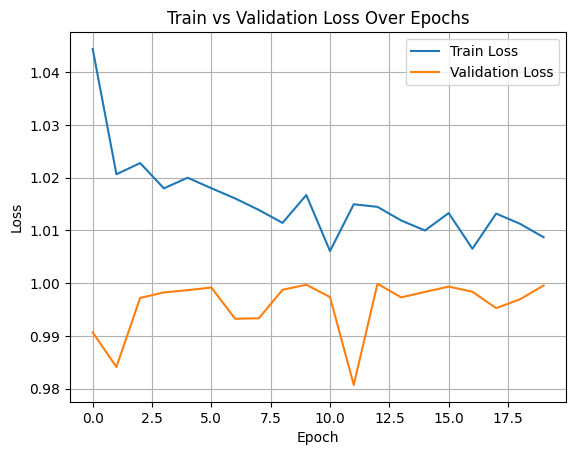

In [12]:
model = Conv_SupContrastive(input_channel_num=3, proj_dim=2, lr=1e-3, loss="ContrastiveLoss")

# Training the model
trainer, log_dir = get_trainer("conv_supcontrast_qg_image", monitor_metric="valid_loss")
trainer.fit(model, train_loader, val_loader)

print("Embeddings after Training")
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(log_dir)

In [18]:
linear_probe = LinearProbe(pretrained_model=model, classes=classes, num_layers=1, lr=1e-3, lr_scheduler_metric="valid_loss")

trainer, log_dir = get_trainer("probing_supcontrast_qg_image", monitor_metric="valid_loss")
trainer.fit(linear_probe, train_loader, val_loader)

# test_result = trainer.test(dataloaders=test_loader)

CometLogger will be initialized in online mode
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch, sklearn.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


logs/probing_supcontrast_qg_image/version_12


COMET INFO: Experiment is live on comet.com https://www.comet.com/duydl/quantum-contrastive-representation-learning/13e49580f0f247ccb01ab5c05fd38abf

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                                            | Type                | Params | Mode 
-------------------------------------------------------------------------------------------------
0  | pretrained_model                                | Conv_SupContrastive | 858    | eval 
1  | pretrained_model.encoder                        | ConvEncoder         | 840    | eval 
2  | pretrained_model.encoder.layers                 | ModuleList          | 840    | eval 
3  | pretrained_model.encoder.layers.0               | ConvUnit            | 240    | eval 
4  | pretrained_model.encoder.layers.0.conv          | Conv2d              | 224    | eval 
5  | pretrained_model.encoder.layers.0.bn            | BatchNorm2d         | 16     | eval 
6  | pretrained_model.encoder.layers.0.activ         | ReLU      

Epoch 19: 100%|██████████| 250/250 [00:04<00:00, 57.69it/s, v_num=8abf, valid_loss=0.664, valid_acc=0.647, train_loss=0.662, train_acc=0.657]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 250/250 [00:04<00:00, 57.57it/s, v_num=8abf, valid_loss=0.664, valid_acc=0.647, train_loss=0.662, train_acc=0.657]


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : probing_supcontrast_qg_image
COMET INFO:     url                   : https://www.comet.com/duydl/quantum-contrastive-representation-learning/13e49580f0f247ccb01ab5c05fd38abf
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     train_acc [20]  : (0.5028125047683716, 0.6591249704360962)
COMET INFO:     train_loss [20] : (0.6621575951576233, 1.4341062307357788)
COMET INFO:     valid_acc [20]  : (0.48500001430511475, 0.6700000166893005)
COMET INFO:     valid_loss [20] : (0.6638131737709045, 0.8326069712638855)
COMET INFO:   Others:
COMET INFO:     Created from : pytorch-lightning
COMET INFO:     Name         : probing_supcontrast_qg_image
COMET INFO